<a href="https://colab.research.google.com/github/AmruthaA27/Task-13--KNN-Algorithm/blob/main/ML_Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

**Importing the dataset**

In [2]:
df_data = pd.read_csv('Social_Network_Ads.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_data['Gender'])
df_data.drop("Gender", axis=1, inplace=True)
df_data["Gender"] = label
df_data

,User ID,Age,EstimatedSalary,Purchased,Gender
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [11]:
X = df_data[["Age","EstimatedSalary"]]
X.astype(int)
Y = df_data[['Purchased']]
Y.astype(int)

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


**Splitting the dataset into the Training set and Test set**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state = 4)

**Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train

,Age,EstimatedSalary
71,24,27000
20,45,22000
337,35,79000
214,47,43000
271,59,76000
...,...,...
360,43,129000
385,56,60000
197,20,36000
174,34,72000


**Fitting Decision Tree Classification to the Training set**

In [14]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(random_state = 0) 
DT_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

**Predicting the Test set results**

In [16]:
DT_pred = DT_model.predict(x_test)
DT_pred.astype(int)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1])

**Making the Confusion Matrix**

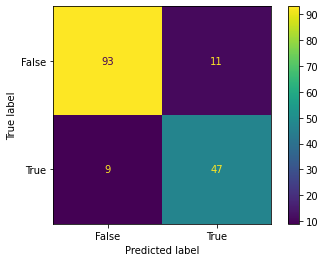

In [19]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,DT_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

**Visualising the Training set results**

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(DT_model, out_file=None, 
                                feature_names="fn",  
                                class_names="cn",
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph



**Visualising the Test set results**

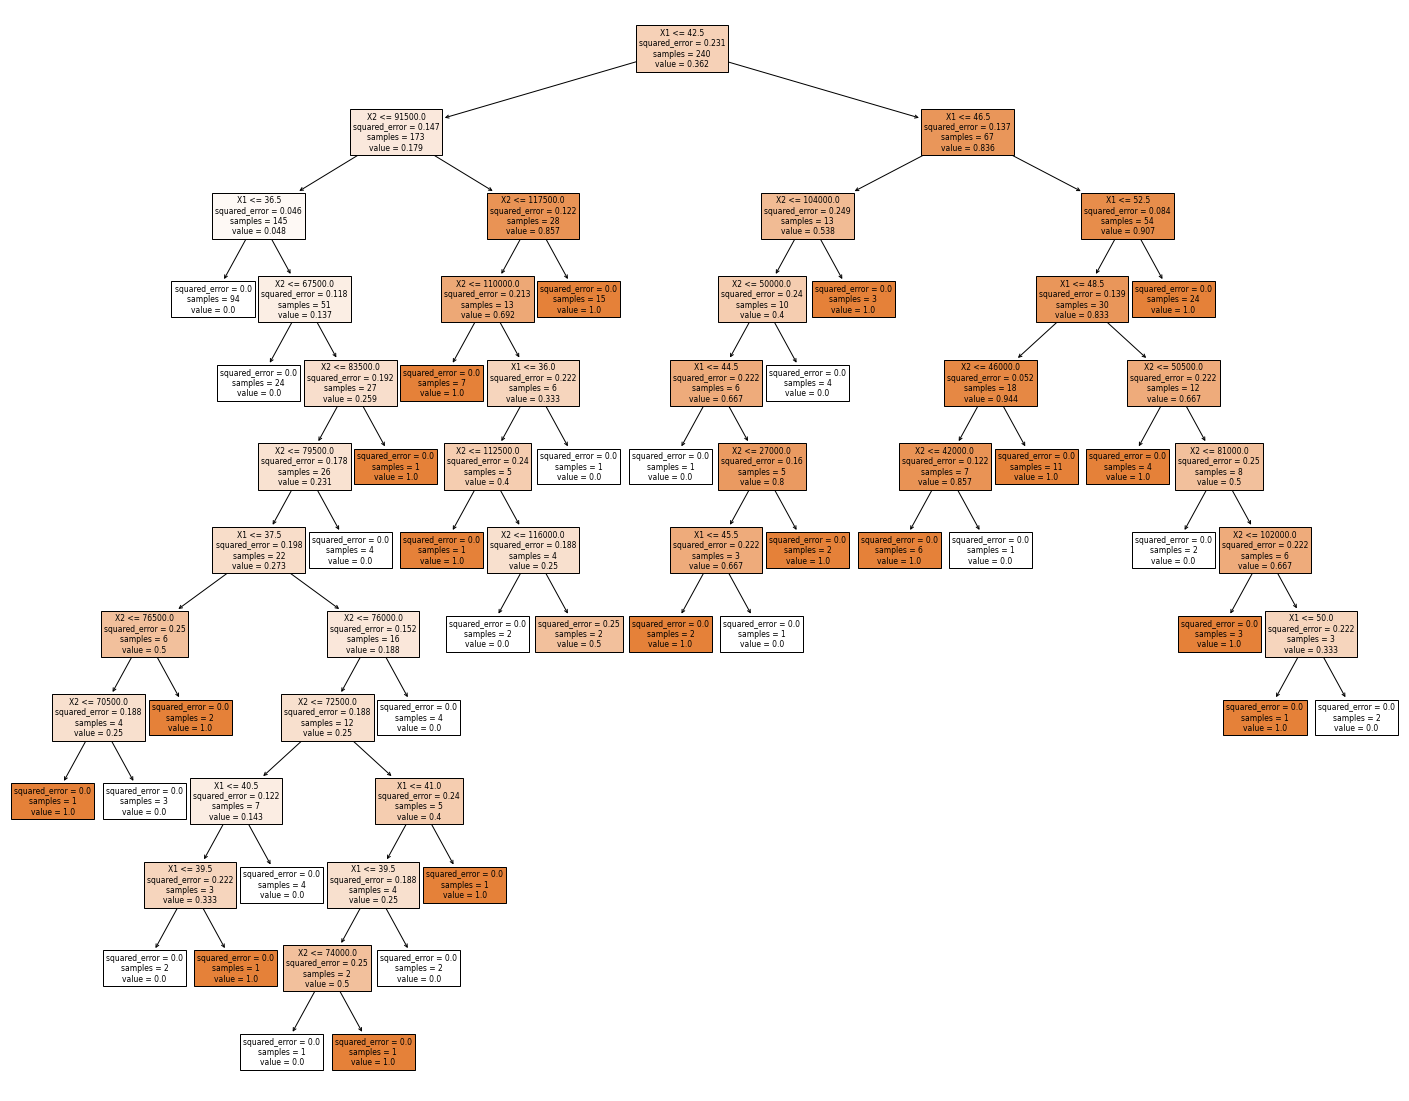

In [20]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = plot_tree(DT_model, 
                   feature_names=["X1","X2","X3","X4","X5"],  
                   filled=True)

In [ ]:
#tree.plot_tree(DT_model)